# Time series forecasting with sktime
Estimated time: 40 min

## Introduction

What is a time series and what can we forecast?

![](../images/ts_quiz.png)

Factors that influence ”forecastability”:
1. How much data is available.
2. How similar the future is to the past.
3. How well we understand the factors that contribute to it.
4. Whether the forecasts can affect the thing we are trying to forecast.

## Agenda

- Quickstart
- Univariate forecasting
    - With statistical models
    - With machine learning models
    - Model evaluation and selection
- Univariate forecasting with exogenous data
- Multivariate forecasting
- Probabilistic forecasting
- Hierarchical forecasting

## Quickstart

Let's start with a typical usecase where you may have been given monthly historic sales data. It might look something like this:

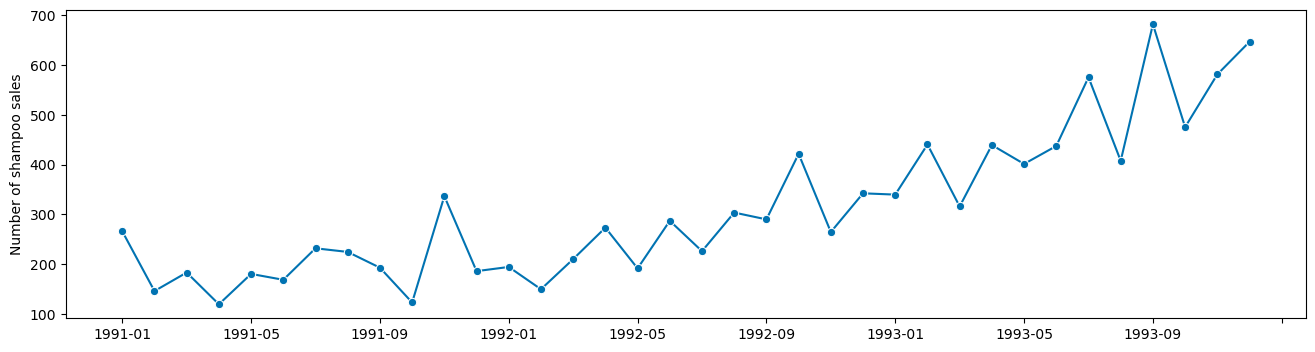

In [66]:
from sktime.datasets import load_shampoo_sales
from sktime.utils.plotting import plot_series

y = load_shampoo_sales()

fig, ax = plot_series(y)

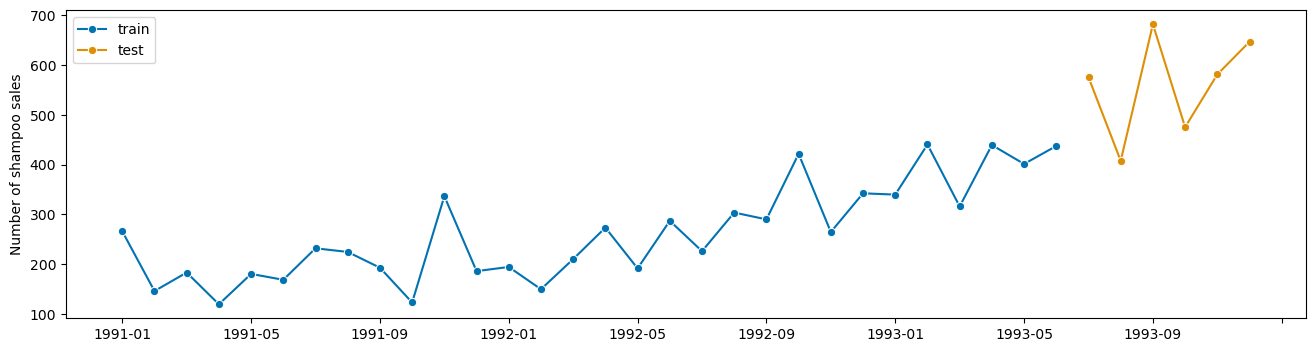

In [67]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y=y, test_size=6)
fig, ax = plot_series(y_train, y_test, labels=["train", "test"])

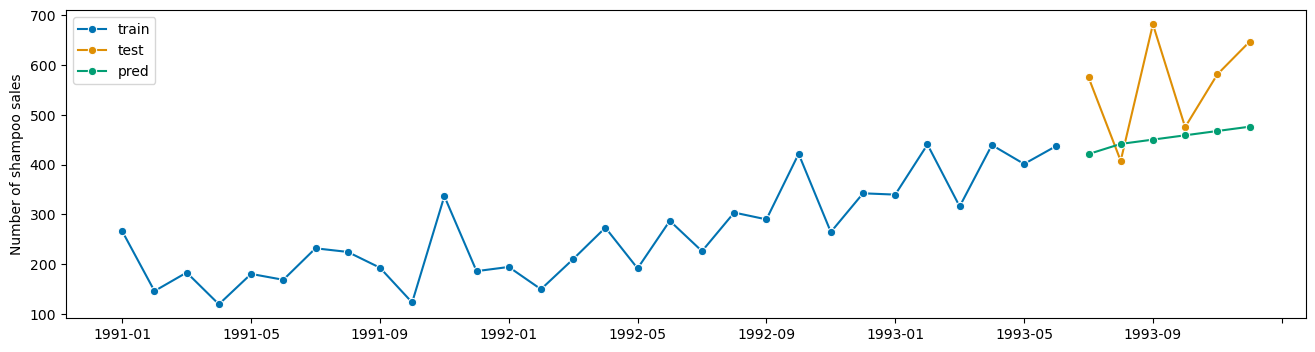

In [68]:
from sktime.forecasting.arima import AutoARIMA

# 1) Define the model
forecaster = AutoARIMA(suppress_warnings=True)

# 2) Fit on train data
forecaster.fit(y_train)

# 3) Use fitted model to predict for a certain forecast horizon (fh)
fh = [1, 2, 3, 4, 5, 6] # Relative to y_train
y_pred = forecaster.predict(fh)

fig, ax = plot_series(y_train, y_test, y_pred, labels=["train", "test", "pred"])

If we have access to the true value of our predictions, as is the case here, we can score the model using the different performance metrics available in `sktime`.

In [69]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

smape = MeanAbsolutePercentageError(symmetric=True)

print(f"AutoARIMA - sMAPE error: {smape(y_test, y_pred):.1%}")

AutoARIMA - sMAPE error: 22.6%


Note on MAPE: we will be using the MAPE (here in its `symmetric` variant) as it is well-known and easy to interpret, but this is not necesarily always the best metric. We encourage users to explore the different metrics available.

Note on single train-test spli: here we presented prediction results on one single data split. This is not the bst way to evaluate model performance but it is easy to showcase. We will explore a best practice approach once we get familiar with the forecasting interface.

## Univariate forecasting

We will go over the two most popular approaches for forecasting univariate time series in `sktime`:
- Classical statistical (econometric) models
- Machine learning (reduction) models

### Statistical (classical) forecasting methods

We can emplore other different stats-based forecasting method availble in `sktime`.

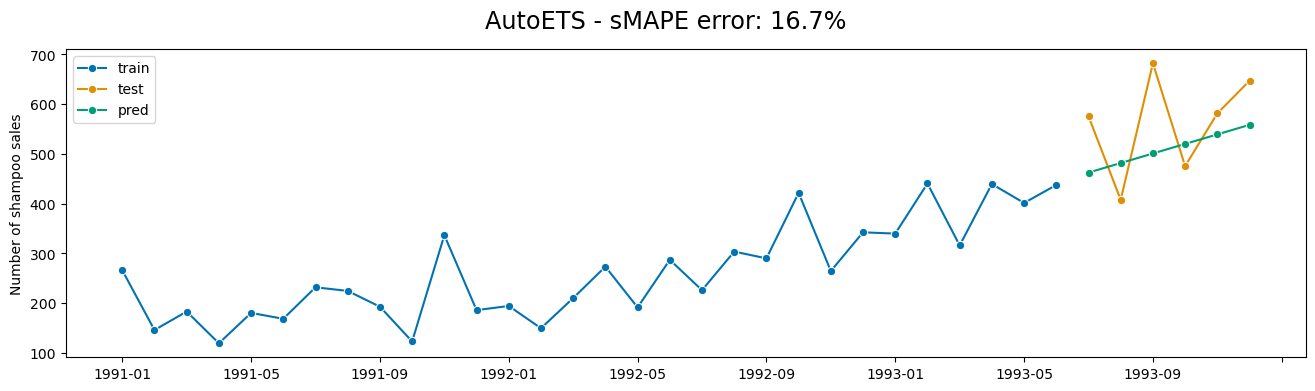

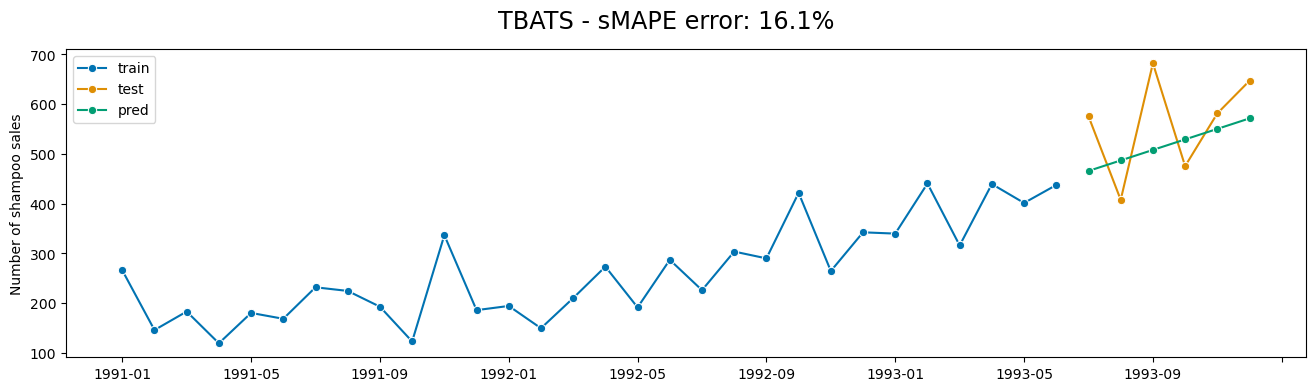

In [70]:
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.ets import AutoETS

forecasters = [AutoETS(auto=True), TBATS()]

for forecaster in forecasters:
    y_pred = forecaster.fit_predict(y=y_train, fh=fh)
    title = (
        f"{str(forecaster).split('(')[0]} - sMAPE error: {smape(y_test, y_pred):.1%}"
    )
    fig, ax = plot_series(
        y_train, y_test, y_pred, labels=["train", "test", "pred"], title=title
    )

Check out all other sktime forecasting algorithms [in the documentation](https://www.sktime.net/en/latest/api_reference/forecasting.html) or by running the code below:

In [71]:
from sktime.registry import all_estimators

all_estimators("forecaster", as_dataframe=True, suppress_import_stdout=False)

,name,estimator
0,ARDL,<class 'sktime.forecasting.ardl.ARDL'>
1,ARIMA,<class 'sktime.forecasting.arima.ARIMA'>
2,AutoARIMA,<class 'sktime.forecasting.arima.AutoARIMA'>
3,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
4,AutoEnsembleForecaster,<class 'sktime.forecasting.compose._ensemble.A...
5,BATS,<class 'sktime.forecasting.bats.BATS'>
6,BaggingForecaster,<class 'sktime.forecasting.compose._bagging.Ba...
7,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
8,ConformalIntervals,<class 'sktime.forecasting.conformal.Conformal...
9,Croston,<class 'sktime.forecasting.croston.Croston'>


### Forecasting with ML algorithms (reduction)

Another very popular approach for time series forecasting is using machine learning algorithms.

Here we will show how to use an sklearn regressor (other popular models such as lightgbm or xgboost can be easily swapped in) to forecast th same sales time series we saw before.

However, although we will be using tabular regressors, forecasting is not the same as supervised regression due to temporal sequencing!

We need to transform our data into a tabular format first, with a table of features and a target columns like the one in the image below:

![](../images/tabularization.png)

This can be tricky to do manually. Thankfully, `sktime` provides tools to make the reduction proceess fool-proof.

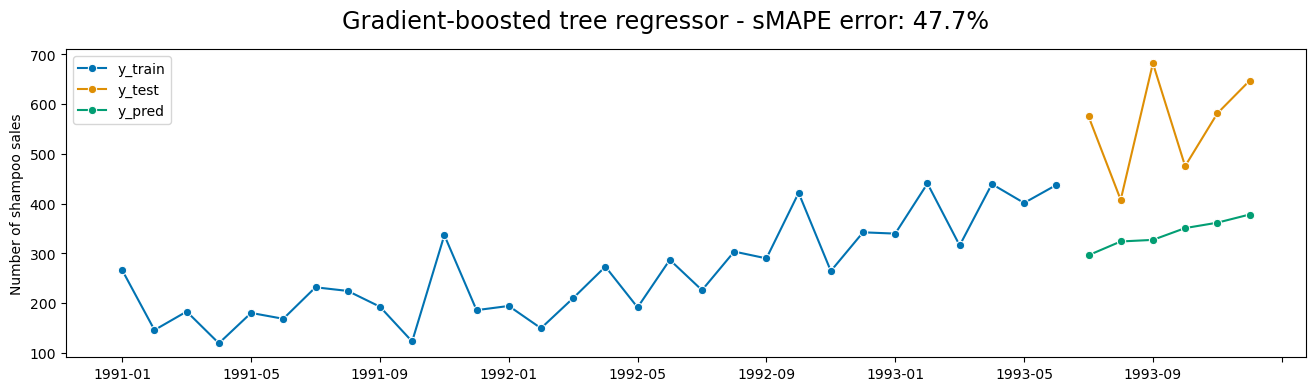

In [72]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sktime.forecasting.compose import make_reduction

# Can be swapped with XBGoost, LightGBM, CatBoost, etc.
regressor = HistGradientBoostingRegressor()

# Create a forecaster from the tabular regressor by wrapping it in `make_reduction`
forecaster = make_reduction(regressor, strategy="direct", window_length=16)

y_pred = forecaster.fit_predict(y=y_train, fh=fh)
title = f"Gradient-boosted tree regressor - sMAPE error: {smape(y_test, y_pred):.1%}"
fig, ax = plot_series(
    y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], title=title
)

You may be wondering why the comparatively bad performance... 

Gradient boosting trees cannot extrapolate, so hey will not forecast values they have not seen.

A simple way to address this is to apply a first-differencing transformation to the data before tabularization.

These data transformations are easy to use in `sktime` by employing transformers.

Let's see how to use the `Differencer` transformer:

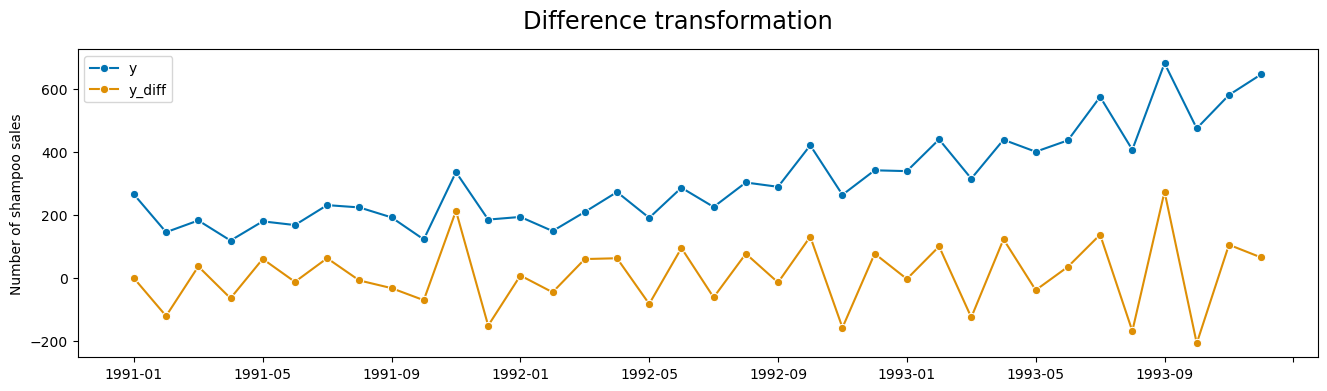

In [73]:
from sktime.transformations.series.difference import Differencer

transformer = Differencer(lags=1)
y_transform = transformer.fit_transform(y)
fig, ax = plot_series(
    y, y_transform, labels=["y", "y_diff"], title="Difference transformation"
)

Transformers can be combined (composed) with forecasters to modify their befaviour.

Let's see how the tree-based forecaster behaves when we combine it with the `Differencer` transformer via the `*` dunder operation.

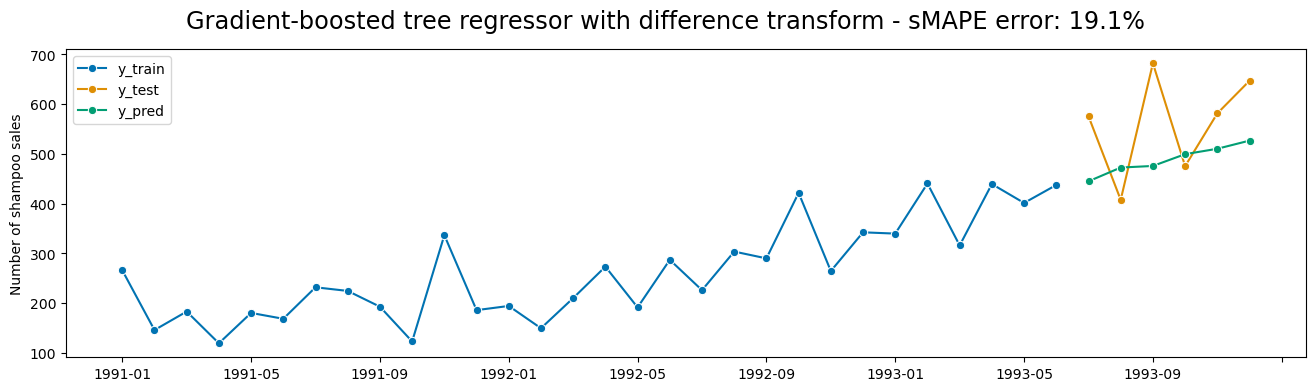

In [74]:
regressor = HistGradientBoostingRegressor()
forecaster = make_reduction(regressor, strategy="direct", window_length=16)
forecaster_with_differencer = Differencer(lags=1) * forecaster

y_pred = forecaster_with_differencer.fit_predict(y=y_train, fh=fh)
title = f"Gradient-boosted tree regressor with difference transform - sMAPE error: {smape(y_test, y_pred):.1%}"
fig, ax = plot_series(
    y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], title=title
)

We will explore transformers and composition in subsequent notebooks.

### Model evaluation and selection

Evaluating model performance as we have been doing previously using a single split is not best practice as it can be unreliable. 

We can do a more robust evaluation by using `sktime`'s cross validation splitters.

#### Window splitters

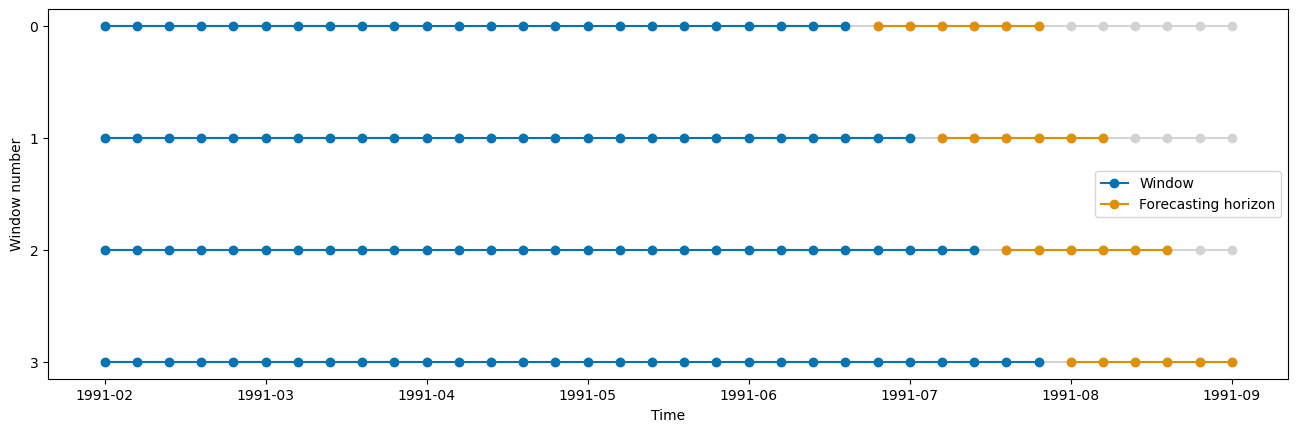

In [75]:
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.utils.plotting import plot_windows

cv = ExpandingWindowSplitter(initial_window=24, fh=fh, step_length=2)
n_folds = cv.get_n_splits(y)
plot_windows(cv, y)

#### Backtesting for single model evaluation

We can leverage this more rebust cross-validation strategies for sinlge model evaluation by using `sktime`'s evaluat function.

In [76]:
from sktime.forecasting.model_evaluation import evaluate
from sktime.performance_metrics.forecasting import MeanSquaredError

forecaster = forecaster_with_differencer.clone()
scorers = [smape, MeanSquaredError(square_root=True)]
backtest = evaluate(
    forecaster=forecaster, y=y, cv=cv, scoring=scorers, backend="dask", return_data=True
)
backtest

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff,y_train,y_test,y_pred,test_MeanSquaredError
0,0.073314,0.721942,0.151289,24,1992-12,1991-01 266.0 1991-02 145.9 1991-03 1...,1993-01 339.7 1993-02 440.4 1993-03 3...,1993-01 326.533333 1993-02 363.933333 19...,38.216397
1,0.197408,0.708025,0.123177,26,1993-02,1991-01 266.0 1991-02 145.9 1991-03 1...,1993-03 315.9 1993-04 439.3 1993-05 4...,1993-03 443.72 1993-04 489.76 1993-05 ...,94.580702
2,0.157410,0.691747,0.141847,28,1993-04,1991-01 266.0 1991-02 145.9 1991-03 1...,1993-05 401.3 1993-06 437.4 1993-07 5...,1993-05 438.042857 1993-06 459.600000 19...,97.546607
3,0.190791,0.681593,0.109754,30,1993-06,1991-01 266.0 1991-02 145.9 1991-03 1...,1993-07 575.5 1993-08 407.6 1993-09 6...,1993-07 444.777778 1993-08 472.444444 19...,118.304354


In [77]:
backtest.loc[0, "y_pred"]

1993-01    326.533333
1993-02    363.933333
1993-03    364.900000
1993-04    430.100000
1993-05    417.066667
1993-06    434.533333
Freq: M, Name: Number of shampoo sales, dtype: float64

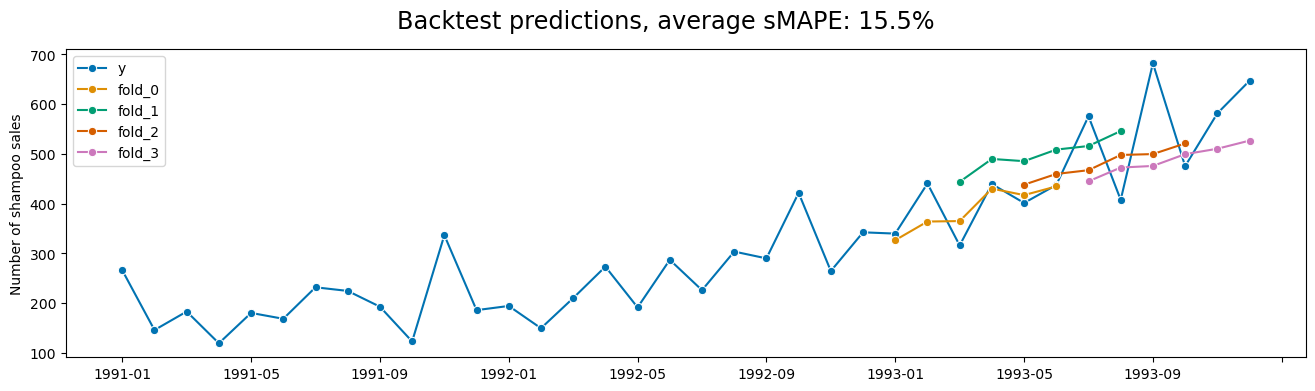

In [78]:
fig, ax = plot_series(
    y,
    *tuple(backtest["y_pred"][i] for i in range(n_folds)),
    labels=["y"] + [f"fold_{i}" for i in range(n_folds)],
    title=f"Backtest predictions, average sMAPE: {backtest['test_MeanAbsolutePercentageError'].mean():.1%}",
)

####  Benchmarking

Now we know how to better assess the performance of a single model, but `sktime` also allows to assess a group of models in the same way by using the `ForecastingBenchmark` class. 

This can be helpfull in a model selection setting where you would like to find out which of a set of models performs best on historical data.

We start by creating an instance of the `ForecastingBenchmark` class.

In [79]:
from sktime.benchmarking.forecasting import ForecastingBenchmark

benchmark = ForecastingBenchmark()

We can now add different models with the `add_estimator` method.

Here we have addded the `NaiveForecaster` as a simple benchmark. This is often a good idea to be able to assess what the baseline prediction accuracy is.

In [80]:
from sktime.forecasting.naive import NaiveForecaster

benchmark.add_estimator(
    estimator=NaiveForecaster(strategy="mean", window_length=3),
    estimator_id="Naive-mean-3-v1",
)
benchmark.add_estimator(estimator=AutoARIMA(), estimator_id="AutoARIMA-v1")
benchmark.add_estimator(estimator=AutoETS(auto=True), estimator_id="AutoETS-v1")
benchmark.add_estimator(
    estimator=forecaster_with_differencer.clone(), estimator_id="LightGBM-v1"
)

Next we define the cross-validation strategy and a list of scorers to set up the task for a given dataset.

In [ ]:
cv = ExpandingWindowSplitter(initial_window=24, fh=fh, step_length=2)
scorers = [smape]

benchmark.add_task(
    load_shampoo_sales,
    cv,
    scorers,
)

Finally we call the `run` method to start the benchmarking process and we can see the results for each model.

In [81]:
results_df = benchmark.run(output_file="results.csv")
results_df.set_index("model_id").iloc[:, -2:].style.format("{:.1%}")

,MeanAbsolutePercentageError_mean,MeanAbsolutePercentageError_std
model_id,,
AutoARIMA-v1,18.4%,6.0%
AutoETS-v1,13.6%,3.4%
LightGBM-v1,15.5%,5.7%
Naive-mean-3-v1,20.3%,4.8%


The benchmarking functionality is currently in active development over the summer programme. We are open to feedback and appreciate contributions

Up to now, we have only tacked a time single series, but it is often the case that we have access to other time series that we expect can help improve performance as it helps predict the time series we are interested in.

A tipical example is when we are forecasting sales and have access to promotions, which we know drive sales. How can we make use of this additional data for forecasting?

## Univariate with exogenous

We start by loading the same sales data we have bee working on before.

In [20]:
from sktime.datasets import load_shampoo_sales

y = load_shampoo_sales()

Let's use the sales data, noise and some simple transformations to create *fake* promotion

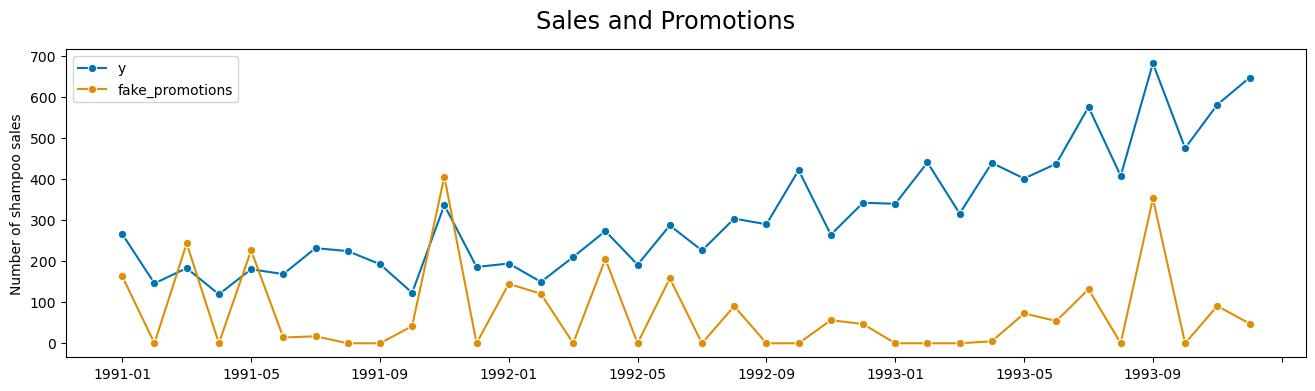

In [22]:
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.transformations.series.difference import Differencer

# Use a differencer, clipping and some noise to generate fake promotional data
transformer = Differencer(lags=1)
y_transform = transformer.fit_transform(y)
noise = np.random.RandomState(seed=93).normal(0, 100, np.shape(y))
X_promo = (y_transform + noise).clip(lower=0)

fig, ax = plot_series(
    y, X_promo, labels=["y", "fake_promotions"], title="Sales and Promotions"
)

We can split both the target time series (y: sales) and the exogenous time series (X: promotions) with the `temporal_train_test_split` we have used before.

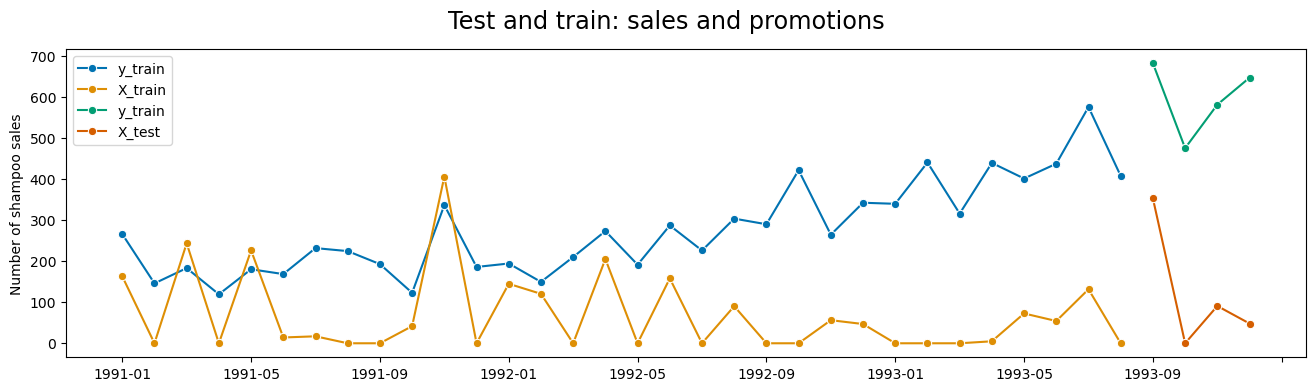

In [23]:
from sktime.forecasting.model_selection import temporal_train_test_split

fh = [1, 2, 3, 4]
y_train, y_test, X_train, X_test = temporal_train_test_split(
    y=y, X=X_promo, test_size=len(fh)
)

fig, ax = plot_series(
    y_train,
    X_train,
    y_test,
    X_test,
    labels=["y_train", "X_train", "y_train", "X_test"],
    title="Test and train: sales and promotions",
)

Now we can forecast y (sales) also using the known values of future X (promotions) by passing the future X data in the predict step.

In [85]:
from sktime.forecasting.arima import AutoARIMA

forecaster = AutoARIMA(suppress_warnings=True)

# Use train data in fit
forecaster.fit(y=y_train, X=X_train, fh=fh)

# Note how the "future" data of X is passed in the predict step
y_pred = forecaster.predict(X=X_test)

Let's see how the prediction looks like when adding promotional data.

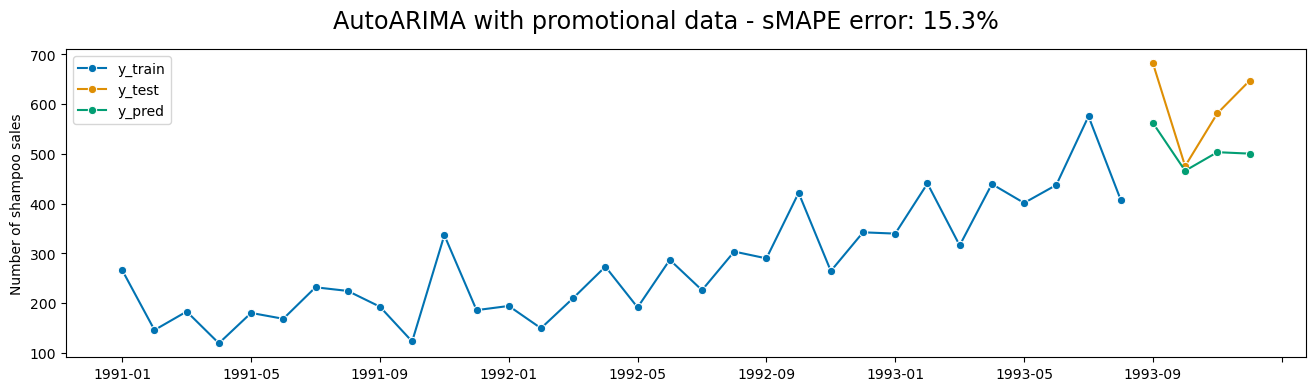

In [86]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

smape = MeanAbsolutePercentageError(symmetric=True)

title = f"AutoARIMA with promotional data - sMAPE error: {smape(y_test, y_pred):.1%}"
fig, ax = plot_series(
    y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], title=title
)

Note: as we created the promotions from the sales data, the performance upflift is over-optimistic (data leakage).

But what if don't have future promotional data?

If we believe that we can forecast `X` (promotions) independently of `y` (sales) we can use these predictions of `X` to inform the predictions of `y`.

Here, we decide to use a different model for `X` than for `y`. This may be the case when we expect a different model to perform better on `X` because the data is of a different nature. We illustrated this here by using the `Croston()` model for `X` as this is a model that is typically used on intermittent data (such as this fake promotion data).

In [24]:
from sktime.forecasting.compose import ForecastX
from sktime.forecasting.croston import Croston

forecaster_X = ForecastX(
    forecaster_y=AutoARIMA(suppress_warnings=True),
    forecaster_X=Croston(),
)
forecaster_X.fit(y=y, X=X_promo, fh=fh)

ForecastX(forecaster_X=Croston(),
          forecaster_y=AutoARIMA(suppress_warnings=True))

After fitting on both `X` and `y` we can creat predictions of `y` directly. Under the hood `sktime` is forecasting `X` with the `Croston()` model and using it in the prediction step of `y`.

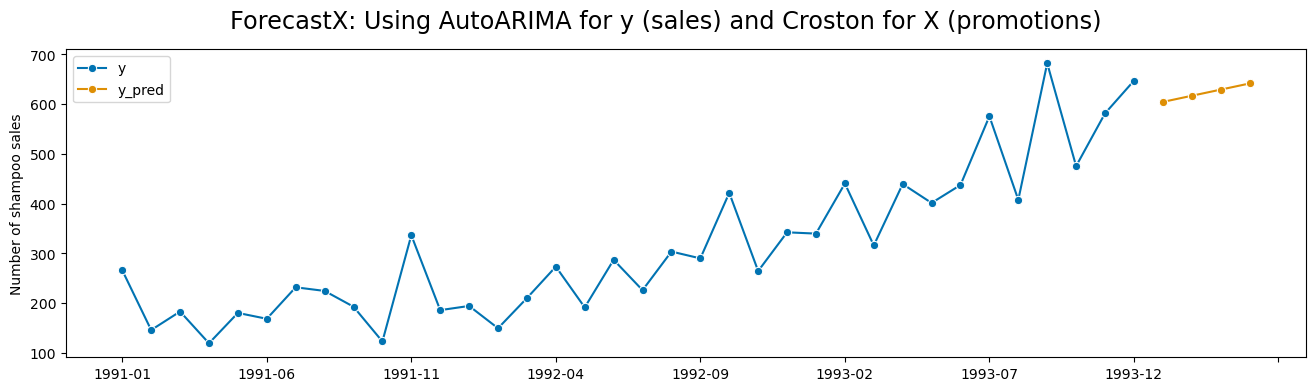

In [88]:
# Now in the `predict` step we don't need to pass X
y_pred = forecaster_X.predict(fh=fh)

title = f"ForecastX: Using AutoARIMA for y (sales) and Croston for X (promotions)"
fig, ax = plot_series(
    y, y_pred, labels=["y", "y_pred"], title=title
)

It can also happen that a single univariate time series in not your focus, but rather you are interested in forecasting a group of time series that represent different aspects of a single entity. 

As an example, you may be interested in forecasting several time series that are macroeconomic indicators that all measure "the economy". In this case, you would be interested in multivariate time series forecasting. Let's see how this can be done with `sktime`.

## Multivariate

We begin by loading the historical data of a couple of macro indicators, which are reported yearly.

In [27]:
from sktime.datasets import load_longley

_, y = load_longley()

y = y.drop(columns=["UNEMP", "ARMED", "POP"])

y

,GNPDEFL,GNP
Period,,
1947,83.0,234289.0
1948,88.5,259426.0
1949,88.2,258054.0
1950,89.5,284599.0
1951,96.2,328975.0
1952,98.1,346999.0
1953,99.0,365385.0
1954,100.0,363112.0
1955,101.2,397469.0


In `sktime` some forecasters such as `VAR()` are purely mutlivariate. Let's use it to make some predictions:

In [28]:
from sktime.forecasting.var import VAR

forecaster = VAR()
forecaster.fit(y, fh=[1, 2, 3])

y_pred = forecaster.predict()
y_pred

,GNPDEFL,GNP
Period,,
1963,121.688295,578514.398653
1964,124.353664,601873.015890
1965,126.847886,625411.588754


We can inspects the tags of the `VAR()` forecasteer through to `get_tags` to check its multivariate nature.

In [30]:
forecaster.get_tags()

{'scitype:y': 'multivariate',
 'ignores-exogeneous-X': True,
 'capability:insample': True,
 'capability:pred_int': True,
 'capability:pred_int:insample': False,
 'handles-missing-data': False,
 'y_inner_mtype': 'pd.DataFrame',
 'X_inner_mtype': 'pd.DataFrame',
 'requires-fh-in-fit': False,
 'X-y-must-have-same-index': True,
 'enforce_index_type': None,
 'fit_is_empty': False,
 'python_version': None,
 'python_dependencies': 'statsmodels',
 'univariate-only': False}

But we can also use univariate forecasters to forecast multiple time series! Let's see how this is done using `ARIMA` which is a purely univariate model.

In [31]:
from sktime.datasets import load_longley
from sktime.forecasting.arima import ARIMA

_, y = load_longley()

y = y.drop(columns=["UNEMP", "ARMED", "POP"])

forecaster = ARIMA()
forecaster.fit(y, fh=[1, 2, 3])

forecaster.forecasters_

1,GNP,GNPDEFL
0,,
forecasters,ARIMA(),ARIMA()


As we can see `sktime` fits one single `ARIMA()` model per time series.

We can also check the nature of the `ARIMA()` model using the `get_tags`.

In [32]:
forecaster.get_tags()

{'scitype:y': 'univariate',
 'ignores-exogeneous-X': False,
 'capability:insample': True,
 'capability:pred_int': True,
 'capability:pred_int:insample': True,
 'handles-missing-data': True,
 'y_inner_mtype': 'pd.Series',
 'X_inner_mtype': 'pd.DataFrame',
 'requires-fh-in-fit': False,
 'X-y-must-have-same-index': True,
 'enforce_index_type': None,
 'fit_is_empty': False,
 'python_version': None,
 'python_dependencies': 'pmdarima'}

We have now covered how to prodce point forcasts for univariate and multivariate data, but in many forecasting settings, point predictions are not enough. Your forcasts, even with the best models, will always carry some degree of uncertainty. 

Therefore, you may also want to be able to express this uncertainty in your forcasts by, for example, providing prdictions intervals. This can be done easily with `sktime`.

## Probabilistic forecasting

In [33]:
from sktime.datasets import load_shampoo_sales

y = load_shampoo_sales()

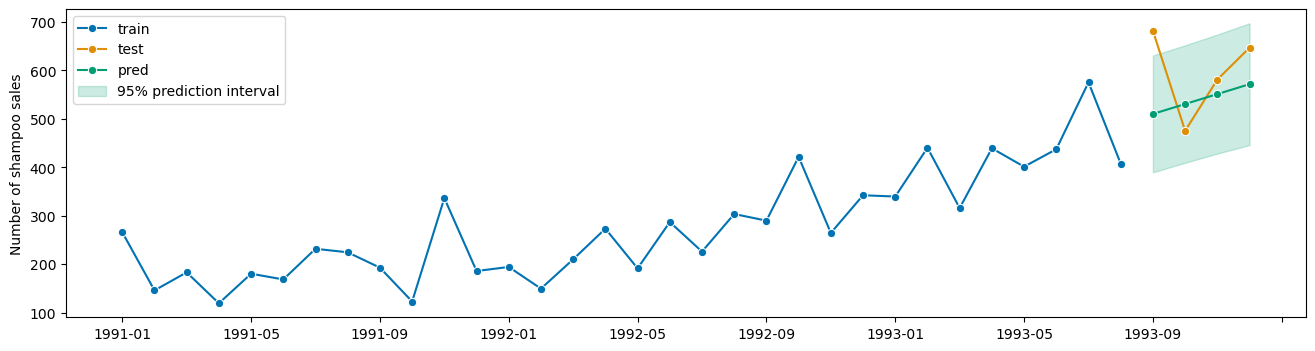

In [35]:
from sktime.forecasting.ets import AutoETS

# 1) Define the model
forecaster = AutoETS(auto=True)

# 2) Fit on train data
forecaster.fit(y_train)

# 3) Use fitted model to predict for a certain forecast horizon (fh)
fh = [1, 2, 3, 4]
y_pred = forecaster.predict(fh)

# 4) Call a probabilistic method after or in place of step 3
y_pred_int = forecaster.predict_interval(coverage=0.95)

fig, ax = plot_series(
    y_train, y_test, y_pred, labels=["train", "test", "pred"], pred_interval=y_pred_int
)

The following methods are possibly available for probabilistic forecasts:

- `predict_interval` produces interval forecasts. Additionally to any `predict` arguments, an argument `coverage` (nominal interval coverage) must be provided.
- `predict_quantiles` produces quantile forecasts. Additionally to any `predict` arguments, an argument `alpha` (quantile values) must be provided.
- `predict_var` produces variance forecasts. This has same arguments as `predict`.
- `predict_proba` produces full distributional forecasts. This has same arguments as `predict`.

| Name | param | prediction/estimate of | `sktime` |
| ---- | ----- | ---------------------- | -------- |
| point forecast | | conditional expectation $\mathbb{E}[y'\|y]$ | `predict` |
| variance forecast | | conditional variance $Var[y'\|y]$ | `predict_var` |
| quantile forecast | $\alpha\in (0,1)$ | $\alpha$-quantile of $y'\|y$ | `predict_quantiles` |
| interval forecast | $c\in (0,1)$| $[a,b]$ s.t. $P(a\le y' \le b\| y) = c$ | `predict_interval` |
| distribution forecast | | the law/distribution of $y'\|y$ | `predict_proba` |

We can check which estimators can perform probabiilistic forecasting by checking `all_stimators`.

In [95]:
from sktime.registry import all_estimators

all_estimators(
    "forecaster",
    filter_tags={"capability:pred_int": True},
    as_dataframe=True,
    suppress_import_stdout=False,
)

,name,estimator
0,ARIMA,<class 'sktime.forecasting.arima.ARIMA'>
1,AutoARIMA,<class 'sktime.forecasting.arima.AutoARIMA'>
2,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
3,BATS,<class 'sktime.forecasting.bats.BATS'>
4,BaggingForecaster,<class 'sktime.forecasting.compose._bagging.Ba...
5,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
6,ConformalIntervals,<class 'sktime.forecasting.conformal.Conformal...
7,DynamicFactor,<class 'sktime.forecasting.dynamic_factor.Dyna...
8,ForecastX,<class 'sktime.forecasting.compose._pipeline.F...
9,ForecastingGridSearchCV,<class 'sktime.forecasting.model_selection._tu...


Note:  estimators that have the `pred_int` tag always have all the probabilistic methods available. So estimators either have all of them or none.

Now let's look at the difference probabilistic methods and their different outputs.

In [36]:
forecaster.predict_interval(coverage=0.95)

Coverage            
               0.95            
              lower       upper
1993-09  389.650236  630.743131
1993-10  409.429859  651.972595
1993-11  428.319020  674.092522
1993-12  446.003062  697.417568

In [37]:
forecaster.predict_quantiles(alpha=[0.275, 0.95])

Quantiles            
              0.275       0.950
1993-09  473.431794  611.362452
1993-10  493.715248  632.475368
1993-11  513.727123  654.335584
1993-12  533.371456  677.207167

In [38]:
forecaster.predict_var()

,0
1993-09,3782.793645
1993-10,3828.427012
1993-11,3931.098665
1993-12,4113.623006


To predict full predictive distributions, `predict_proba` can be used. This returns a `BaseDistribution` child instance.

In [39]:
forecaster.predict_proba()

Normal(columns=Index(['Number of shampoo sales'], dtype='object'),
       index=PeriodIndex(['1993-09', '1993-10', '1993-11', '1993-12'], dtype='period[M]'),
       mu=         Number of shampoo sales
1993-09               510.196684
1993-10               530.701227
1993-11               551.205771
1993-12               571.710315,
       sigma=                 0
1993-09  61.504420
1993-10  61.874284
1993-11  62.698474
1993-12  64.137532)

## Hierarchical forecasting

![](../images/hierarchy.png)

Let's use some sktime utilities to create a hierarchical dataframe of historical monthly sales

In [42]:
from odsc_utils import load_product_hierarchy

y = load_product_hierarchy()

y

Sales
Product line      Product group Date          
Food preparation  Hobs          2000-01  245.0
                                2000-02  144.0
                                2000-03  184.0
                                2000-04  265.0
                                2000-05  236.0
...                                        ...
Food preservation Fridges       2004-08  176.0
                                2004-09  205.0
                                2004-10   59.0
                                2004-11  151.0
                                2004-12  173.0

[240 rows x 1 columns]

We can pick a specific date to clearly see the hierarchy.

In [43]:
# Multiindex slicing can become important when using hierarchical data!
y.loc[(slice(None), slice(None), "2000-01")]

Sales
Product line      Product group       
Food preparation  Hobs           245.0
                  Ovens          114.0
Food preservation Freezers       164.0
                  Fridges        136.0

Now we can visualize the different time series in the hierarchy

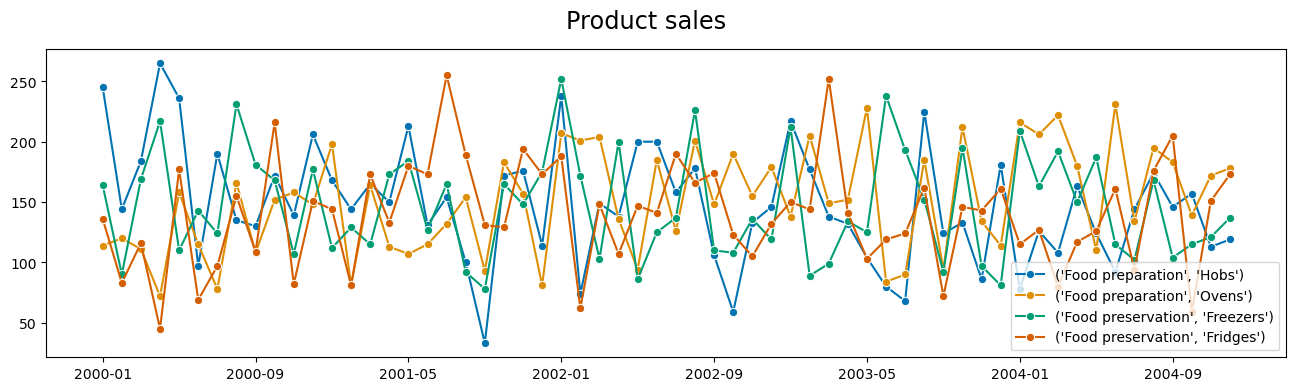

In [264]:
product_index = y.droplevel(-1).index.unique()
fig, ax = plot_series(*(y.loc[idx] for idx in product_index), labels=product_index, title="Product sales")

Forecasting this data simultaneously is easy as `sktime` automatically vectorizes/"up-casts" the models to hierarchical data.

In [265]:
from sktime.forecasting.ets import AutoETS

forecaster = AutoETS(auto=True)

y_pred = forecaster.fit_predict(y, fh=[1])
y_pred

Sales
Product line      Product group Date               
Food preparation  Hobs          2005-01  119.460419
                  Ovens         2005-01  169.749332
Food preservation Freezers      2005-01  146.466778
                  Fridges       2005-01  139.583316

In [266]:
forecaster.forecasters_

1                                  forecasters
Food preparation  Hobs      AutoETS(auto=True)
                  Ovens     AutoETS(auto=True)
Food preservation Freezers  AutoETS(auto=True)
                  Fridges   AutoETS(auto=True)

When working with hierarchies we often want to provide forecasts of the aggregated levels too.

Right now for this we would manually sum up the predictions for the lower levels that we are interested in.

A better way to do this is by using the `Aggregator` transformer in `sktime`.

In [53]:
from sktime.transformations.hierarchical.aggregate import Aggregator

y_hier = Aggregator().fit_transform(y)

y_hier.loc[(slice(None), slice(None), "2000-01")]

Sales
Product line      Product group       
Food preparation  Hobs           245.0
                  Ovens          114.0
                  __total        359.0
Food preservation Freezers       164.0
                  Fridges        136.0
                  __total        300.0
__total           __total        659.0

In [54]:
forecaster = AutoETS(auto=True, random_state=0)

y_hier_pred = forecaster.fit_predict(y_hier, fh=1)
y_hier_pred

Sales
Product line      Product group Date               
Food preparation  Hobs          2005-01  119.460419
                  Ovens         2005-01  169.749332
                  __total       2005-01  298.431496
Food preservation Freezers      2005-01  146.466778
                  Fridges       2005-01  139.583316
                  __total       2005-01  286.049279
__total           __total       2005-01  584.481241

If we compare the predictions at the top level with the sum of the bottom level forecast we can check that they are not the same!

In [47]:
584.481241 - (119.460419 + 169.749332 + 146.466778 + 139.583316)

9.221396000000027

This is because independent instances of each forecaster are fitted per level and there is currently no constrain to ensure the predictions add up.

In [55]:
forecaster.forecasters_

1                                                  forecasters
Food preparation  Hobs      AutoETS(auto=True, random_state=0)
                  Ovens     AutoETS(auto=True, random_state=0)
                  __total   AutoETS(auto=True, random_state=0)
Food preservation Freezers  AutoETS(auto=True, random_state=0)
                  Fridges   AutoETS(auto=True, random_state=0)
                  __total   AutoETS(auto=True, random_state=0)
__total           __total   AutoETS(auto=True, random_state=0)

We can use `ReconcilerForecaster` enfore hierarchical reconciliation to solve this problem.

The `ReconcilerForecaster` takes in a forecaster and add a reconciliation method.

In [56]:
from sktime.forecasting.reconcile import ReconcilerForecaster

reconciler_forecaster = ReconcilerForecaster(
    forecaster=forecaster.clone(), method="bu"
)

y_hier_pred = reconciler_forecaster.fit_predict(y_hier, fh=1)
y_hier_pred

Sales
Product line      Product group Date               
Food preparation  Hobs          2005-01  119.460419
                  Ovens         2005-01  169.749332
                  __total       2005-01  289.209751
Food preservation Freezers      2005-01  146.466778
                  Fridges       2005-01  139.583316
                  __total       2005-01  286.050094
__total           __total       2005-01  575.259845

Now the top level and sum of the bottom level are the same.

In [57]:
575.259845 - (119.460419 + 169.749332 + 146.466778 + 139.583316)

1.1368683772161603e-13

We can retirieve the available reconciliation methods easily.

In [275]:
print("Valid reconciliation methods:")
for method in ReconcilerForecaster.METHOD_LIST:
    print(f"- {method}")

Valid reconciliation methods:
- mint_cov
- mint_shrink
- wls_var
- bu
- ols
- wls_str
- td_fcst


We can also define different forecasters at different hierarchy levels (or hierarchy nodes) by using the `HierarchyEnsembleForecaster`. 

Forecasters built this way also aggregate the hierachical data for you under the hood.

In [59]:
from odsc_utils import load_product_hierarchy

y = load_product_hierarchy()

In [61]:
from sktime.forecasting.compose import HierarchyEnsembleForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS

forecasters = [
    ('Auto ARIMA', AutoARIMA(), 0),
    ('Auto ETS', AutoETS(auto=True), 1)
]

forecaster = HierarchyEnsembleForecaster(
                forecasters=forecasters,
                by='level', default = AutoETS(auto=True)
)

y_pred = forecaster.fit_predict(y, fh=[1])

y_pred

Sales
Product line      Product group Date               
Food preparation  Hobs          2005-01  119.460419
                  Ovens         2005-01  169.749332
                  __total       2005-01  298.431496
Food preservation Freezers      2005-01  146.466778
                  Fridges       2005-01  139.583316
                  __total       2005-01  286.049279
__total           __total       2005-01  585.824586

Up to now, we have been always forecasting the hierachical data locally, but we can also leverage global forecasting:
- Local: fit a model to each time series locally
- Global: fit a single model to all the series

### Global forecasting

Benefits of global forecasting:
- The model has access to more data to learn from, great when individual time series are short.
- Faster than local approach
- Empirically shown to outperform local models (e.g. M5 forecasting competition)

Note: global models assume the data generating procress for the group of time series is the same or at least similar.

In [58]:
from odsc_utils import load_product_hierarchy
from sktime.forecasting.model_selection import temporal_train_test_split

y = load_product_hierarchy()

y_train, y_test = temporal_train_test_split(y_hier, test_size=4)

y_test

Sales
Product line      Product group Date          
Food preparation  Hobs          2004-09  146.0
                                2004-10  157.0
                                2004-11  113.0
                                2004-12  119.0
                  Ovens         2004-09  183.0
                                2004-10  139.0
                                2004-11  172.0
                                2004-12  178.0
                  __total       2004-09  329.0
                                2004-10  296.0
                                2004-11  285.0
                                2004-12  297.0
Food preservation Freezers      2004-09  104.0
                                2004-10  115.0
                                2004-11  121.0
                                2004-12  137.0
                  Fridges       2004-09  205.0
                                2004-10   59.0
                                2004-11  151.0
                                2004-12  173.0
                  __total       2004-09  309.0
                                2004-10  174.0
                                2004-11  272.0
                                2004-12  310.0
__total           __total       2004-09  638.0
                                2004-10  470.0
                                2004-11  557.0
                                2004-12  607.0

Let's begin by using local forecasting with the gradient boosting regressor we used previously to forecast the hierarchical data.

In [277]:
regressor = HistGradientBoostingRegressor()
forecaster = make_reduction(regressor, strategy="direct", window_length=12, pooling="local")

y_pred = forecaster.fit_predict(y_train, fh=[1, 2, 3, 4])

In [278]:
forecaster.forecasters_

1                                                                 forecasters
Food preparation  Hobs      DirectTabularRegressionForecaster(estimator=Hi...
                  Ovens     DirectTabularRegressionForecaster(estimator=Hi...
                  __total   DirectTabularRegressionForecaster(estimator=Hi...
Food preservation Freezers  DirectTabularRegressionForecaster(estimator=Hi...
                  Fridges   DirectTabularRegressionForecaster(estimator=Hi...
                  __total   DirectTabularRegressionForecaster(estimator=Hi...
__total           __total   DirectTabularRegressionForecaster(estimator=Hi...

We can adapt the error metrics to a hierarchical setting by using `multilevel` argument to obtain scores for each level.

In [280]:
hier_smape = MeanAbsolutePercentageError(symmetric=True, multilevel="raw_values")
errors_local = hier_smape(y_test, y_pred)
errors_local

1                           MeanAbsolutePercentageError
Food preparation  Hobs                         0.134782
                  Ovens                        0.175641
                  __total                      0.076075
Food preservation Freezers                     0.307519
                  Fridges                      0.482346
                  __total                      0.135877
__total           __total                      0.144789

Now with the same regressor, we do global forecasting by setting the `pooling` argument to `global`.

In [281]:
regressor = HistGradientBoostingRegressor()
forecaster = make_reduction(regressor, strategy="direct", window_length=12, pooling="global")

y_pred = forecaster.fit_predict(y_train, fh=[1, 2, 3, 4])

Let's compare the scores for the `local` and `global` approach.

In [282]:
errors_global = hier_smape(y_test, y_pred)

print(f"Average sMAPE with local pooling: {errors_local.mean().iloc[0]:.1%}")
print(f"Average sMAPE with global pooling: {errors_global.mean().iloc[0]:.1%}")

Average error with local pooling: 20.8%
Average error with global pooling: 19.4%


Quick recap of what we have covered in this notebook:

- Univariate forecasting (stats and ML)
- Univariate with exogenous data
- Multivariate forecasting
- Probabilistic forecasting
- Hierarchical forecasting

### Credits: notebook 3 - forecasting

notebook creation: marrov, fkiraly